In [ ]:
7import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(r'/content/Mall_Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(['Genre','Age'],axis=1,inplace=True)

In [ ]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


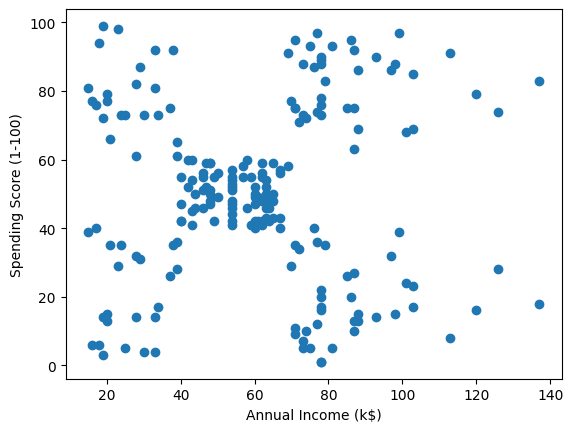

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

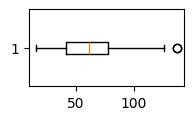

In [ ]:
plt.figure(figsize=(2,1))
plt.boxplot(df['Annual Income (k$)'],vert=False)
plt.show()

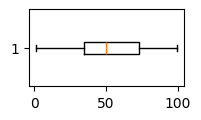

In [ ]:
plt.figure(figsize=(2,1))
plt.boxplot(df['Spending Score (1-100)'],vert=False)
plt.show()

In [ ]:
df.sort_values('Annual Income (k$)', ascending=False).head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
199,200,137,83
198,199,137,18
197,198,126,74
196,197,126,28
195,196,120,79


In [ ]:
mask=df['Annual Income (k$)']<137
NEW_df=df[mask]
NEW_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              198 non-null    int64
 1   Annual Income (k$)      198 non-null    int64
 2   Spending Score (1-100)  198 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [ ]:
x = NEW_df.iloc[:,1:].values
x.shape

(198, 2)

In [ ]:
from sklearn.cluster import KMeans


ValueError: x and y must have same first dimension, but have shapes (8,) and (10,)

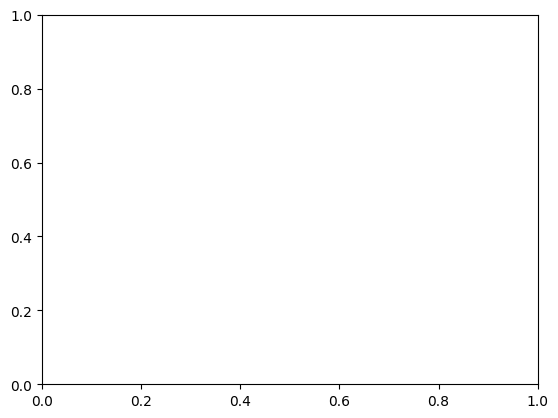

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,9), wcss,marker="*",mfc="r",c="m",ms =10)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.annotate("optimal k ",xy=(5,5000))
plt.ylabel('WCSS')
plt.show()

In [ ]:
model=KMeans(n_clusters=5)
model.fit(x)
y=model.predict(x)

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

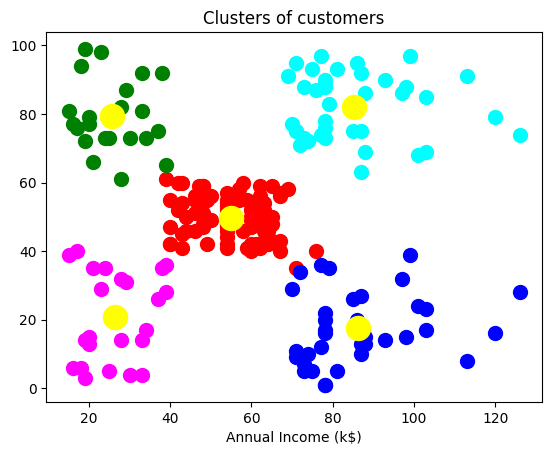

In [ ]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel

In [ ]:
model.cluster_centers_

array([[55.0875    , 49.7125    ],
       [86.34285714, 17.57142857],
       [25.72727273, 79.36363636],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348]])